# **Financial Planning and Control:**

Problem Source: Birge, John R., and Francois Louveaux. Introduction to stochastic programming. Springer Science & Business Media, 2011.

**Problem Statement:**

Suppose we wish to provide for a child’s college education $Y$ years from now. We currently have $ \$\ b$ to invest in any of $I$ investments. After $Y$ years, we will have a wealth that we would like to have exceed a tuition goal of $ \$\ G$ . We suppose that we can change investments every $υ$ years, so we have $H = Y/υ$ investment periods. For our purposes here, we ignore transaction costs and taxes on income although these considerations would be important in reality. We also assume that all figures are in constant dollars.

In formulating the problem, we must first describe our objective in mathematical terms. We suppose that exceeding $ \$\ G$ after $Y$ years would be equivalent to our having an income of $q\ \%$ of the excess while not meeting the goal would lead to borrowing for a cost $r\ \%$ of the amount short. This gives us the concave utility function in Figure $2$.

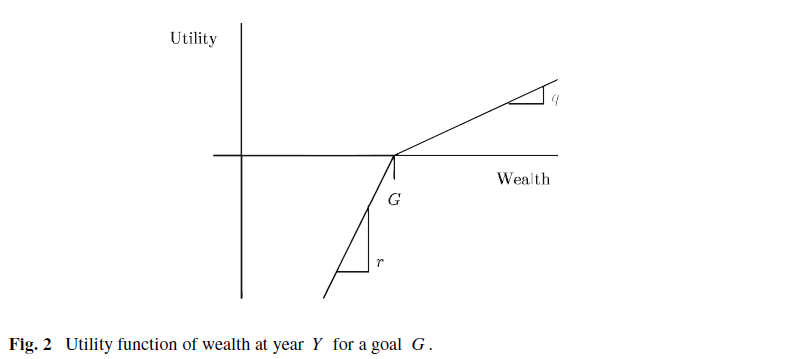

The major uncertainty in this model is the return on each investment $i$ within each period $t$. We describe this random variable as $ξ(i, t) = ξ (i, t, ω)$ where ω is some underlying random element. The decisions on investments will also be random. We describe these decisions as $x(i, t)=x(i, t,ω)$. From the randomness of the returns and investment decisions, our final wealth will also be a random variable.

To illustrate the effects of including stochastic outcomes as well as modeling effects from choosing the time horizon $Y$ and the coarseness of the period approximations $H$ , we use a simple example with two possible investment types, stocks $( i = 1 )$ and government securities (bonds) $( i = 2 )$. We begin by setting $Y$ at $15$ years and allow investment changes every five years so that $H = 3$.

We assume that, over the three decision periods, eight possible scenarios may occur. The scenarios correspond to independent and equal likelihoods of having (inflation-adjusted) returns of $1.25$ for stocks and $1.14$ for bonds or $1.06$ for stocks and $1.12$ for bonds over the five-year period. We indicate the scenarios by an index $s = 1, . . . ,8$ , which represents a collection of the outcomes $ω$ that have common characteristics (such as returns) in a specific model. When we wish to allow more general interpretations of the outcomes, we use the base element $ω$ .With the scenarios defined here, we assign probabilities for each $s$ , $p(s) = 0.125$ . We use initial wealth, $b = 55,000$ ; target value, $G = 80,000$ ; surplus reward, $q = 1$ ; and shortage penalty, $r = 4$.

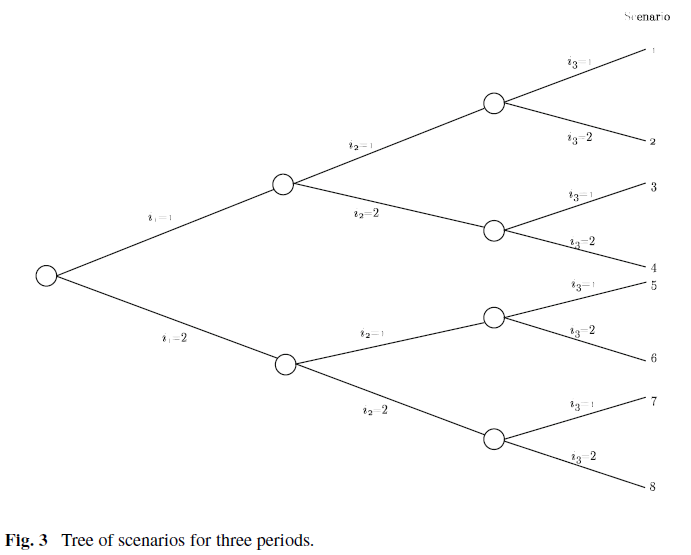

**Modeling:**

$\\ $

$Objective\ Function:\\ $

$Max \sum_{s_{1} =1}^{2} \sum_{s_{2} =1}^{2} \sum_{s_{3} =1}^{2} 0.125  \big(y  \big(s_{1}, s_{2}, s_{3}\big) -4w  \big(s_{1}, s_{2}, s_{3}\big) \big)$

$\\ $

$Constraints:\\ $

$x \big(1,1\big) + x \big(2,1\big) = 55$

$-1.25x \big(1,1\big) - 1.14x \big(2,1\big) + x \big(1,2,1\big) + x \big(2,2,1\big) = 0$

$-1.06x \big(1,1\big) - 1.12x \big(2,1\big) + x \big(1,2,2\big) + x \big(2,2,2\big) = 0$

$-1.25x \big(1,2,1\big) - 1.14x \big(2,2,1\big)+ x \big(1,3,1,1\big) + x \big(2,3,1,1\big) =0$

$-1.06x \big(1,2,1\big) - 1.12x \big(2,2,1\big)+ x \big(1,3,1,2\big) + x \big(2,3,1,2\big) =0$

$-1.25x \big(1,2,2\big) - 1.14x \big(2,2,2\big)+ x \big(1,3,2,1\big) + x \big(2,3,2,1\big) =0$

$-1.06x \big(1,2,2\big) - 1.12x \big(2,2,2\big)+ x \big(1,3,2,2\big) + x \big(2,3,2,2\big) =0$

$1.25x \big(1,3,1,1\big) + 1.14x \big(2,3,1,1\big) -y\big(1,1,1\big) + w\big(1,1,1\big)= 80$

$1.06x \big(1,3,1,1\big) + 1.12x \big(2,3,1,1\big) -y\big(1,1,2\big) + w\big(1,1,2\big)= 80$

$1.25x \big(1,3,1,2\big) + 1.14x \big(2,3,1,2\big) -y\big(1,2,1\big) + w\big(1,2,1\big)= 80$

$1.06x \big(1,3,1,2\big) + 1.12x \big(2,3,1,2\big) -y\big(1,2,2\big) + w\big(1,2,2\big)= 80$

$1.25x \big(1,3,2,1\big) + 1.14x \big(2,3,2,1\big) -y\big(2,1,1\big) + w\big(2,1,1\big)= 80$

$1.06x \big(1,3,2,1\big) + 1.12x \big(2,3,2,1\big) -y\big(2,1,2\big) + w\big(2,1,2\big)= 80$

$1.25x \big(1,3,2,2\big) + 1.14x \big(2,3,2,2\big) -y\big(2,2,1\big) + w\big(2,2,1\big)= 80$

$1.06x \big(1,3,2,2\big) + 1.12x \big(2,3,2,2\big) -y\big(2,2,2\big) + w\big(2,2,2\big)= 80$

$x \big(i,t,s_{1},...,s_{t-1}\big)\geq0$

$y\big(s_{1},s_{2},s_{3}\big)\geq0$

$w\big(s_{1},s_{2},s_{3}\big)\geq0$

In [ ]:
!pip install pulp
from pulp import *
import numpy as np
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.2 MB 5.2 MB/s 


In [ ]:
#Defining the problem

b = 55
g = 80
d = 4
No_scenarios = 2
project = [1, 2]
s11 = list(range(1,No_scenarios+1))
s22 = list(range(1,No_scenarios+1))
s33 = list(range(1,No_scenarios+1))
s_1 = [1.25, 1.06]
s_2 = [1.14, 1.12]
p = [0.5, 0.5]

In [ ]:
#Defining variables

X1 = LpVariable.dicts('X1',((p,1) for p in project), lowBound=0, cat='Continuous')
X2 = LpVariable.dicts('X2',((p,2,s1) for p in project for s1 in s11), lowBound=0, cat='Continuous')
X3 = LpVariable.dicts('X3',((p,3,s1,s2) for p in project for s1 in s11 for s2 in s22), lowBound=0, cat='Continuous')
y = LpVariable.dicts('y',((s1,s2,s3) for s1 in s11 for s2 in s22 for s3 in s33), lowBound=0, cat='Continuous')
w = LpVariable.dicts('w',((s1,s2,s3) for s1 in s11 for s2 in s22 for s3 in s33), lowBound=0, cat='Continuous')

In [ ]:
#Defining Objective Function

Model= LpProblem('Maximize_Profit', LpMaximize)

Model+= lpSum(p[s1-1]*p[s2-1]*p[s3-1]*(y[s1,s2,s3]-d*w[s1,s2,s3]) for s1 in s11 for s2 in s22 for s3 in s33)

In [ ]:
#Constraints

Model+= lpSum(X1)==b

for s1 in s11:
    Model+= X2[1,2,s1] + X2[2,2,s1] == s_1[s1-1]*X1[1,1]+ s_2[s1-1]*X1[2,1]
    
for s1 in s11:
    for s2 in s22:
        Model+= X3[1,3,s1,s2] + X3[2,3,s1,s2] == s_1[s2-1]*X2[1,2,s1]+ s_2[s2-1]*X2[2,2,s1]

for s1 in s11:
    for s2 in s22:
        for s3 in s33:
            Model+= s_1[s3-1]*X3[1,3,s1,s2] + s_2[s3-1]*X3[2,3,s1,s2] - y[s1,s2,s3] + w[s1,s2,s3] == g

In [ ]:
#Model summary

Model

Maximize_Profit:
MAXIMIZE
-0.5*w_(1,_1,_1) + -0.5*w_(1,_1,_2) + -0.5*w_(1,_2,_1) + -0.5*w_(1,_2,_2) + -0.5*w_(2,_1,_1) + -0.5*w_(2,_1,_2) + -0.5*w_(2,_2,_1) + -0.5*w_(2,_2,_2) + 0.125*y_(1,_1,_1) + 0.125*y_(1,_1,_2) + 0.125*y_(1,_2,_1) + 0.125*y_(1,_2,_2) + 0.125*y_(2,_1,_1) + 0.125*y_(2,_1,_2) + 0.125*y_(2,_2,_1) + 0.125*y_(2,_2,_2) + 0.0
SUBJECT TO
_C1: X1_(1,_1) + X1_(2,_1) = 55

_C2: - 1.25 X1_(1,_1) - 1.14 X1_(2,_1) + X2_(1,_2,_1) + X2_(2,_2,_1) = 0

_C3: - 1.06 X1_(1,_1) - 1.12 X1_(2,_1) + X2_(1,_2,_2) + X2_(2,_2,_2) = 0

_C4: - 1.25 X2_(1,_2,_1) - 1.14 X2_(2,_2,_1) + X3_(1,_3,_1,_1)
 + X3_(2,_3,_1,_1) = 0

_C5: - 1.06 X2_(1,_2,_1) - 1.12 X2_(2,_2,_1) + X3_(1,_3,_1,_2)
 + X3_(2,_3,_1,_2) = 0

_C6: - 1.25 X2_(1,_2,_2) - 1.14 X2_(2,_2,_2) + X3_(1,_3,_2,_1)
 + X3_(2,_3,_2,_1) = 0

_C7: - 1.06 X2_(1,_2,_2) - 1.12 X2_(2,_2,_2) + X3_(1,_3,_2,_2)
 + X3_(2,_3,_2,_2) = 0

_C8: 1.25 X3_(1,_3,_1,_1) + 1.14 X3_(2,_3,_1,_1) + w_(1,_1,_1) - y_(1,_1,_1)
 = 80

_C9: 1.06 X3_(1,_3,_1,_1) + 1.12 X

In [ ]:
#Solving model

Model.solve()
print('Optimal Solution:', pulp.value(Model.objective))

Optimal Solution: -1.5140846500001404


In [ ]:
#Optimal values of variables

for variables in Model.variables():
  print('{}:{}'.format(variables.name, variables.varValue))

X1_(1,_1):41.479272
X1_(2,_1):13.520728
X2_(1,_2,_1):65.094582
X2_(1,_2,_2):36.743215
X2_(2,_2,_1):2.168138
X2_(2,_2,_2):22.368029
X3_(1,_3,_1,_1):83.839905
X3_(1,_3,_1,_2):0.0
X3_(1,_3,_2,_1):0.0
X3_(1,_3,_2,_2):64.0
X3_(2,_3,_1,_1):0.0
X3_(2,_3,_1,_2):71.428571
X3_(2,_3,_2,_1):71.428571
X3_(2,_3,_2,_2):0.0
w_(1,_1,_1):0.0
w_(1,_1,_2):0.0
w_(1,_2,_1):0.0
w_(1,_2,_2):0.0
w_(2,_1,_1):0.0
w_(2,_1,_2):0.0
w_(2,_2,_1):0.0
w_(2,_2,_2):12.16
y_(1,_1,_1):24.799881
y_(1,_1,_2):8.870299
y_(1,_2,_1):1.4285714
y_(1,_2,_2):0.0
y_(2,_1,_1):1.4285714
y_(2,_1,_2):0.0
y_(2,_2,_1):-1.127494e-12
y_(2,_2,_2):0.0


In [ ]:
VNames = []
for variables in Model.variables():
  VNames.append(variables.name)

VValue = []
for variables in Model.variables():
  VValue.append(np.round(variables.varValue, 2))

data = {'Variables': VNames, 'Value': VValue}
pd.DataFrame(data, index = range(1, len(VValue)+1))

,Variables,Value
1,"X1_(1,_1)",41.48
2,"X1_(2,_1)",13.52
3,"X2_(1,_2,_1)",65.09
4,"X2_(1,_2,_2)",36.74
5,"X2_(2,_2,_1)",2.17
6,"X2_(2,_2,_2)",22.37
7,"X3_(1,_3,_1,_1)",83.84
8,"X3_(1,_3,_1,_2)",0.00
9,"X3_(1,_3,_2,_1)",0.00
10,"X3_(1,_3,_2,_2)",64.00


In [ ]:
print('Current Status: ', LpStatus[Model.status])

Current Status:  Optimal
